### Importing libraries 

In [289]:
import pandas as pd
import seaborn as sns
import numpy as np
from dateutil import parser
import matplotlib.pyplot as plt

### Importing Data

In [290]:
df = pd.read_csv('data/ytdataframe.csv')

dff = pd.read_csv('data/ytunlabeled2.csv')

dff.head()


,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,video_id,avg polarity score,channelTitle,title,...,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,subscribers,totalViews,totalVideos
0,0,0.0,0.0,0.0,0.0,0.0,jGwO_UgTS7I,0.277473,Stanford Online,"Stanford CS229: Machine Learning Course, Lectu...",...,1410150,18797,NaN,76,PT1H15M20S,hd,True,369000,20517888,1850
1,1,1.0,1.0,1.0,1.0,1.0,4b4MUYve_U8,0.234844,Stanford Online,Stanford CS229: Machine Learning - Linear Regr...,...,561083,6564,NaN,31,PT1H18M17S,hd,True,369000,20517888,1850
2,2,2.0,2.0,2.0,2.0,2.0,het9HFqo1TQ,0.236257,Stanford Online,Locally Weighted & Logistic Regression | Stanf...,...,264242,2629,NaN,10,PT1H19M34S,hd,True,369000,20517888,1850
3,3,3.0,3.0,3.0,3.0,3.0,iZTeva0WSTQ,0.237893,Stanford Online,Lecture 4 - Perceptron & Generalized Linear Mo...,...,129002,1091,NaN,3,PT1H22M2S,hd,True,369000,20517888,1850
4,4,4.0,4.0,4.0,4.0,4.0,nt63k3bfXS0,0.244639,Stanford Online,Lecture 5 - GDA & Naive Bayes | Stanford CS229...,...,125920,1291,NaN,8,PT1H18M52S,hd,True,369000,20517888,1850


In [291]:
dff = dff.drop(['Unnamed: 0', 'Unnamed: 0.2', 'Unnamed: 0.3', 'Unnamed: 0.4', 'Unnamed: 0.5'], axis=1)


In [292]:
df.head(5)

,Unnamed: 0,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,subscribers,totalViews,totalVideos,avg polarity score,Label
0,0,d56mG7DezGs,Programming with Mosh,TypeScript Tutorial for Beginners [2022],TypeScript Tutorial for Beginners. Learn TypeS...,"['typescript tutorial', 'learn typescript', 't...",2022-05-23T13:00:18Z,190224,4957,NaN,567,PT1H4M28S,hd,False,2710000,129809111,171,0.199642,reputable
1,1,Ke90Tje7VS0,Programming with Mosh,React JS - React Tutorial for Beginners,React JS Tutorial - Get up & running with Reac...,"['react js', 'react tutorial', 'learn react', ...",2018-07-16T16:51:44Z,5174623,81494,NaN,4871,PT2H25M27S,hd,False,2710000,129809111,171,0.305360,reputable
2,2,0-S5a0eXPoc,Programming with Mosh,React Native Tutorial for Beginners - Build a ...,React Native Tutorial for Beginners - Learn to...,"['react native', 'react native tutorial', 'rea...",2020-05-11T16:00:11Z,2112507,36594,NaN,1736,PT2H6M30S,hd,True,2710000,129809111,171,0.300777,reputable
3,3,k5E2AVpwsko,Programming with Mosh,Angular Tutorial for Beginners: Learn Angular ...,Angular tutorial for beginners: Learn Angular ...,"['learn angular 4', 'learn angular 4 from scra...",2017-09-05T16:48:15Z,3461546,51637,NaN,2153,PT2H2M42S,hd,False,2710000,129809111,171,0.304859,reputable
4,4,W6NZfCO5SIk,Programming with Mosh,JavaScript Tutorial for Beginners: Learn JavaS...,Watch this JavaScript tutorial for beginners t...,"['javascript tutorial', 'javascript for beginn...",2018-04-24T02:37:33Z,8154940,146493,NaN,5377,PT48M17S,hd,True,2710000,129809111,171,0.288010,reputable


In [293]:
df.describe()

,Unnamed: 0,viewCount,likeCount,favouriteCount,commentCount,subscribers,totalViews,totalVideos,avg polarity score
count,160.000000,1.600000e+02,160.000000,0.0,160.000000,1.600000e+02,1.600000e+02,160.000000,160.000000
mean,79.500000,3.927198e+05,8957.743750,NaN,393.481250,6.778249e+05,4.409150e+07,4838.500000,0.338064
std,46.332134,9.833002e+05,21263.480475,NaN,825.018018,1.298520e+06,8.267774e+07,38075.994422,0.092491
min,0.000000,1.880000e+02,2.000000,NaN,0.000000,8.000000e+00,4.940000e+02,4.000000,0.000000
25%,39.750000,1.289625e+04,102.750000,NaN,18.750000,4.270000e+03,5.641192e+05,81.000000,0.316482
50%,79.500000,5.640800e+04,1315.000000,NaN,133.000000,1.400000e+05,8.679674e+06,218.000000,0.340861
75%,119.250000,2.712722e+05,8286.250000,NaN,360.750000,6.440000e+05,5.953507e+07,684.000000,0.342008
max,159.000000,8.154940e+06,146493.000000,NaN,5377.000000,6.130000e+06,4.108876e+08,342151.000000,0.865800


In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          160 non-null    int64  
 1   video_id            160 non-null    object 
 2   channelTitle        160 non-null    object 
 3   title               160 non-null    object 
 4   description         160 non-null    object 
 5   tags                145 non-null    object 
 6   publishedAt         160 non-null    object 
 7   viewCount           160 non-null    int64  
 8   likeCount           160 non-null    int64  
 9   favouriteCount      0 non-null      float64
 10  commentCount        160 non-null    int64  
 11  duration            160 non-null    object 
 12  definition          160 non-null    object 
 13  caption             160 non-null    bool   
 14  subscribers         160 non-null    int64  
 15  totalViews          160 non-null    int64  
 16  totalVid

# Data preprocessing 

Checking duplicates

In [295]:
df.duplicated().sum()


0

In [296]:
df = df.drop_duplicates()
df.shape

(160, 19)

Checking null values

In [297]:
df.isnull().sum()


Unnamed: 0              0
video_id                0
channelTitle            0
title                   0
description             0
tags                   15
publishedAt             0
viewCount               0
likeCount               0
favouriteCount        160
commentCount            0
duration                0
definition              0
caption                 0
subscribers             0
totalViews              0
totalVideos             0
avg polarity score      0
Label                   0
dtype: int64

Convert publish date to year

In [298]:
df['publishedAt'] = df['publishedAt'].apply(lambda x: parser.parse(x)) 
df['pushblishYear'] = df['publishedAt'].apply(lambda x: x.strftime("%Y"))

dff['publishedAt'] = dff['publishedAt'].apply(lambda x: parser.parse(x)) 
dff['pushblishYear'] = dff['publishedAt'].apply(lambda x: x.strftime("%Y"))

Convert count columns to numeric

In [299]:
numeric_cols = ['viewCount', 'likeCount', 'commentCount', 'pushblishYear']

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

dff[numeric_cols] = dff[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

Convert duration to seconds

In [300]:
import isodate
df['durationSecs'] = df['duration'].apply(lambda x: isodate.parse_duration(x))
df['durationSecs'] = df['durationSecs'].astype('timedelta64[s]')

dff['durationSecs'] = dff['duration'].apply(lambda x: isodate.parse_duration(x))
dff['durationSecs'] = dff['durationSecs'].astype('timedelta64[s]')

Add tag count

In [301]:


df['tagCount'] = df['tags'].apply(lambda x: 0 if x is np.nan else len(x))

dff['tagCount'] = dff['tags'].apply(lambda x: 0 if x is np.nan else len(x))

Add title and description length

In [302]:
df['title length'] = df['title'].apply(lambda x: 0 if x is np.nan else len(x))
df['description length'] = df['description'].apply(lambda x: 0 if x is np.nan else len(x))

dff['title length'] = dff['title'].apply(lambda x: 0 if x is np.nan else len(x))
dff['description length'] = dff['description'].apply(lambda x: 0 if x is np.nan else len(x))


In [303]:
new_cols = ["channelTitle","viewCount",'likeCount','commentCount','definition','caption','subscribers','totalViews','totalVideos','avg polarity score','pushblishYear','durationSecs','tagCount','title length','description length']
dff=dff[new_cols]
#or
dff=dff.reindex(columns=new_cols)

Dropping columns we wont use

In [304]:
df = df.drop(['Unnamed: 0', 'description', 'title', 'publishedAt', 'duration', 'favouriteCount', 'video_id', 'tags'], axis=1)



# EDA

### Label distribution 

reputable        100
non reputable     60
Name: Label, dtype: int64

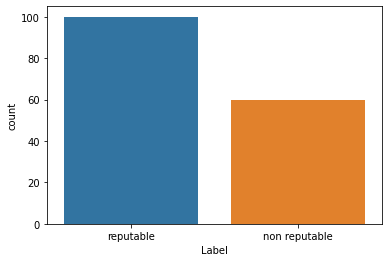

In [305]:
sns.countplot(x="Label", data=df)
df["Label"].value_counts()

Our data is unbalanced so we might need oversampling

In [306]:
# sns.scatterplot(x="commentCount", y="durationSecs", hue="Label", data = df)

In [307]:
# df_dist = df.select_dtypes([int,float]) 
# fig = plt.figure(figsize=(15, 18)) 
# try:
#     for i,columns in enumerate(df_dist.columns, 1): 
#         ax = plt.subplot(5,3,i) 
#         sns.kdeplot(x=df_dist[columns])
#         ax.set_xlabel(None) 
#         ax.set_title(f'{columns}')
#         plt.tight_layout(w_pad=3) 
# except ValueError as ve:
#     exit;      
# plt.show()

# Modeling

In [308]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

Label encoding 

In [309]:
le = LabelEncoder()

df2 = ['channelTitle', 'definition', 'caption', 'Label']

df[df2] = df[df2].apply(le.fit_transform)

dffs = ['channelTitle', 'definition', 'caption']
dff[dffs] = dff[dffs].apply(le.fit_transform)



df.head(1)

,channelTitle,viewCount,likeCount,commentCount,definition,caption,subscribers,totalViews,totalVideos,avg polarity score,Label,pushblishYear,durationSecs,tagCount,title length,description length
0,19,190224,4957,567,0,0,2710000,129809111,171,0.199642,1,2022,3868.0,342,40,1562


<AxesSubplot:>

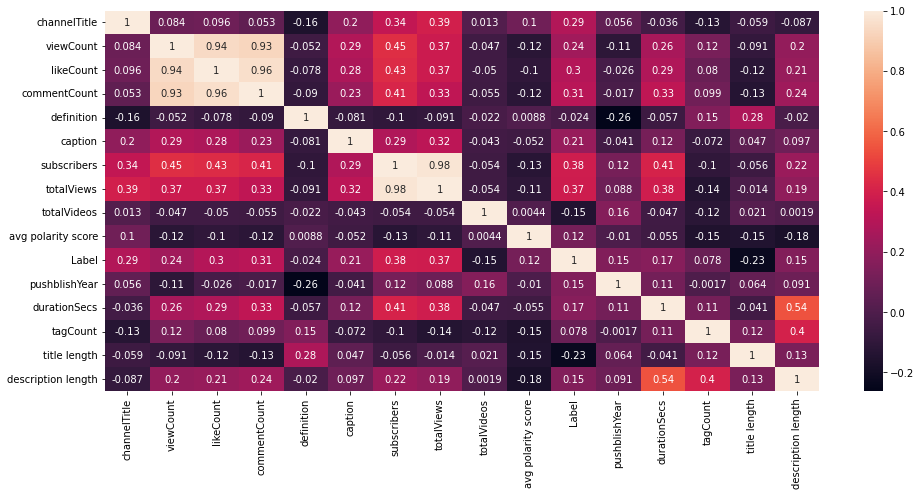

In [310]:
plt.figure(figsize=(16, 7))
sns.heatmap(df.corr(), annot = True)

Oversampling and splitting

In [311]:
# from sklearn.preprocessing import StandardScaler
# scale = StandardScaler()
from imblearn.over_sampling import SMOTE

feat_col = ['channelTitle', 'viewCount', 'likeCount', 'definition', 'commentCount', 'caption', 'subscribers', 'totalViews', 'totalVideos', 'avg polarity score', 'pushblishYear', 'durationSecs', 'tagCount', 'description length', 'title length']

X = df[feat_col] # Features
y = df['Label']# Target variable


In [312]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

#Create an oversampled training data
smote = SMOTE(random_state = 16)
X_train, y_train = smote.fit_resample(X_train, y_train)

### Logistic Regression

In [313]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16, max_iter=1000)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [314]:
from sklearn.metrics import classification_report
target_names = ['reputable', 'non reputable']
print(classification_report(y_test, y_pred, target_names=target_names))
print("Train Accuracy:",logreg.score(X_train, y_train))
print("Test Accuracy:",logreg.score(X_test, y_test))

               precision    recall  f1-score   support

    reputable       0.68      1.00      0.81        15
non reputable       1.00      0.72      0.84        25

     accuracy                           0.82        40
    macro avg       0.84      0.86      0.82        40
 weighted avg       0.88      0.82      0.83        40

Train Accuracy: 0.8933333333333333
Test Accuracy: 0.825


In [315]:
from random import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model = LogisticRegression(max_iter=1000)
cross_val = KFold(n_splits=5, random_state=16, shuffle=True)
scores = cross_val_score(model, X_train, y_train, cv=cross_val, scoring='roc_auc')
print("Mean AUC Score - Logistic Regression: ", scores.mean())

Mean AUC Score - Logistic Regression:  0.9212255739902799


# Testing different models

### Random Forest

In [316]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
kfold = KFold(n_splits=5, random_state=16, shuffle=True) 
scores = cross_val_score(model1, X_train, y_train, cv=kfold, scoring='roc_auc')
print("Mean AUC Score - Random Forest: ", scores.mean())

Mean AUC Score - Random Forest:  0.9794034690799396


In [317]:
# fit the model with data
model1.fit(X_train, y_train)

rf_pred = model1.predict(X_test)

print("Random Forest Train Accuracy:",model1.score(X_train, y_train))
print("Random Forest Test Accuracy:",model1.score(X_test, y_test))
target_names = ['reputable', 'non reputable']
print(classification_report(y_test, rf_pred, target_names=target_names))

Random Forest Train Accuracy: 1.0
Random Forest Test Accuracy: 0.975
               precision    recall  f1-score   support

    reputable       0.94      1.00      0.97        15
non reputable       1.00      0.96      0.98        25

     accuracy                           0.97        40
    macro avg       0.97      0.98      0.97        40
 weighted avg       0.98      0.97      0.98        40



### Decision Tree

In [318]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
cross_val = KFold(n_splits=5, random_state=16, shuffle=True)
scores = cross_val_score(model2, X_train, y_train, cv=cross_val, scoring='roc_auc')
print("Mean AUC Score - Decision Tree: ", scores.mean())

Mean AUC Score - Decision Tree:  0.8989617898441427


In [319]:
# fit the model with data
model2.fit(X_train, y_train)

dc_pred = model2.predict(X_test)

print("Decision Tree Train Accuracy:",model2.score(X_train, y_train))
print("Decision Tree Test Accuracy:",model2.score(X_test, y_test))
target_names = ['reputable', 'non reputable']
print(classification_report(y_test, dc_pred, target_names=target_names))


Decision Tree Train Accuracy: 1.0
Decision Tree Test Accuracy: 0.95
               precision    recall  f1-score   support

    reputable       0.88      1.00      0.94        15
non reputable       1.00      0.92      0.96        25

     accuracy                           0.95        40
    macro avg       0.94      0.96      0.95        40
 weighted avg       0.96      0.95      0.95        40



### XGBClassifier

In [320]:
from xgboost import XGBClassifier
model4 = XGBClassifier()
cross_val = KFold(n_splits=5, random_state=16, shuffle=True)
scores = cross_val_score(model4, X_train, y_train, cv=cross_val, scoring='roc_auc')
print("Mean AUC Score - XGB: ", scores.mean())

Mean AUC Score - XGB:  0.9515992961287079


In [321]:
# fit the model with data
model4.fit(X_train, y_train)

xgb_pred = model4.predict(X_test)

print("XGB Train Accuracy:",model4.score(X_train, y_train))
print("XGB Test Accuracy:",model4.score(X_test, y_test))
target_names = ['reputable', 'non reputable']
print(classification_report(y_test, xgb_pred, target_names=target_names))

XGB Train Accuracy: 1.0
XGB Test Accuracy: 0.975
               precision    recall  f1-score   support

    reputable       0.94      1.00      0.97        15
non reputable       1.00      0.96      0.98        25

     accuracy                           0.97        40
    macro avg       0.97      0.98      0.97        40
 weighted avg       0.98      0.97      0.98        40



### K-Nearest Neighbors

In [322]:
from sklearn.neighbors import KNeighborsClassifier
model5 = KNeighborsClassifier()
cross_val = KFold(n_splits=5, random_state=16, shuffle=True)
scores = cross_val_score(model5, X_train, y_train, cv=cross_val, scoring='roc_auc')
print("Mean AUC Score - K-Nearest Neighbors: ", scores.mean())

Mean AUC Score - K-Nearest Neighbors:  0.9467990615049438


In [323]:
# fit the model with data
model5.fit(X_train, y_train)

k_pred = model5.predict(X_test)

print("KNN Train Accuracy:",model5.score(X_train, y_train))
print("KNN Test Accuracy:",model5.score(X_test, y_test))

KNN Train Accuracy: 0.92
KNN Test Accuracy: 0.9


In [324]:
from sklearn.metrics import classification_report

target_names = ['reputable', 'non reputable']
print(classification_report(y_test, k_pred, target_names=target_names))

               precision    recall  f1-score   support

    reputable       0.79      1.00      0.88        15
non reputable       1.00      0.84      0.91        25

     accuracy                           0.90        40
    macro avg       0.89      0.92      0.90        40
 weighted avg       0.92      0.90      0.90        40



From the 5 scores above the top 3 performers were Logistic Regression,XGBClassifier and K-Neasrest Neighbors. We will move ahead and fine tune them.

# Hyper parameters tuning

In [325]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'C': np.linspace(.0001, 1000, 200) , 'penalty': ["l2"]}]
clf = GridSearchCV(logreg, tuned_parameters, cv=cross_val, scoring= 'roc_auc')
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print("\nOptimized model achieved an ROC of:", round(clf.score(X_train, y_train), 4))
print("LogReg Train Accuracy:",clf.score(X_train, y_train))
print("LogReg Test Accuracy:",clf.score(X_test, y_test))

Best parameters set found on development set:

{'C': 30.150850753768847, 'penalty': 'l2'}

Optimized model achieved an ROC of: 0.9397
LogReg Train Accuracy: 0.9397333333333333
LogReg Test Accuracy: 0.9440000000000001


Random forest

In [326]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Instantiate the grid search model
clf2 = GridSearchCV(model1, param_grid=param_grid, cv=cross_val, n_jobs=-1, verbose=2)

clf2.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf2.best_params_)
print("\nOptimized model achieved an ROC of:", round(clf2.score(X_train, y_train), 4))
print("RF Train Accuracy:",clf2.score(X_train, y_train))
print("RF Test Accuracy:",clf2.score(X_test, y_test))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best parameters set found on development set:

{'bootstrap': True, 'max_depth': 90, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}

Optimized model achieved an ROC of: 0.96
RF Train Accuracy: 0.96
RF Test Accuracy: 0.925


KNN

In [327]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Use GridSearch
clf3 = GridSearchCV(model5, hyperparameters, cv=cross_val, n_jobs=-1, verbose=2)
#Fit the model
clf3.fit(X_train, y_train)
#Print The value of best Hyperparameters
print("Best parameters set found on development set:")
print()
print(clf3.best_params_)

print("\nOptimized model achieved an ROC of:", round(clf3.score(X_train, y_train), 4))
print("KNN Train Accuracy:",clf3.score(X_train, y_train))
print("KNN Test Accuracy:",clf3.score(X_test, y_test))

Fitting 5 folds for each of 2842 candidates, totalling 14210 fits
Best parameters set found on development set:

{'leaf_size': 1, 'n_neighbors': 1, 'p': 1}

Optimized model achieved an ROC of: 1.0
KNN Train Accuracy: 1.0
KNN Test Accuracy: 0.95


XGB

In [328]:
#List Hyperparameters that we want to tune.
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

#Use GridSearch
clf4 = GridSearchCV(model4, params, cv=cross_val, n_jobs=-1, verbose=2)

#Fit the model
clf4.fit(X_train, y_train)

#Print The value of best Hyperparameters
print("Best parameters set found on development set:")
print()
print(clf4.best_params_)

print("\nOptimized model achieved an ROC of:", round(clf4.score(X_train, y_train), 4))
print("XGB Train Accuracy:",clf4.score(X_train, y_train))
print("XGB Test Accuracy:",clf4.score(X_test, y_test))

Fitting 5 folds for each of 1458 candidates, totalling 7290 fits


c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
2430 fits failed out of a total of 7290.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python310\lib\site-packages\xgboost\core.py", line 575, in inner_f
    return f(**kwargs)
  File "c:\Python310\lib\site-packages\xgboost\sklearn.py", line 1400, in fit
    self._Booster = train(
  File "c:\Python310\lib\site-packages\xgboost\core.py", line 575, in inner_f
    return f(**kwargs)
  File "c:\Python310\li

Best parameters set found on development set:

{'base_score': 0.5, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.01, 'n_estimators': 500, 'reg_alpha': 1, 'reg_lambda': 1}

Optimized model achieved an ROC of: 0.9933
XGB Train Accuracy: 0.9933333333333333
XGB Test Accuracy: 0.975


# Save model

In [329]:
# import pickle

# pickle.dump(clf, open('LogRegModelInitial', 'wb'))

# Labelling data using our model

In [337]:
dff = dff.fillna(0)

dff.isnull().sum()

channelTitle          0
viewCount             0
likeCount             0
commentCount          0
definition            0
caption               0
subscribers           0
totalViews            0
totalVideos           0
avg polarity score    0
pushblishYear         0
durationSecs          0
tagCount              0
title length          0
description length    0
dtype: int64

Labeling

In [339]:
new_pred = model1.predict(dff)
print(new_pred)

749


c:\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


Assigning the labels

In [ ]:
dffs = pd.read_csv('data/ytunlabeled2.csv')

dffs['Label'] = None

dffs = dffs.assign(Label = new_pred)

dffs.to_csv(r'data/ytlabeled.csv')